
# The Impact of Socio-Economic Status on Number of Firearms in States

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

### Overview of Dataset
#### Gun Data
This data is from the FBI's National Instant Criminal Background Check System (NICS). During the purchase of a firearm, gun sellers use the NICS to ensure buyers are eligible to purchase guns. The data ranges from 1997 to 2017. It contains data for each month of each year, by state, with the columns breaking down the gun checks into permit checks, permit rechecks, type of gun sold (hangun, long_gun, other), and detail of sale (rentals, prepawn, returned, etc). There is also a 'total' column for each row. 
It should be noted that the data does not directly correlate to the number of guns purchased, but can give a general overview of the demand for guns in a state. Gun checks do not have a one-to-one connection to number of guns sold in a state.

#### Census Data
This data is U.S. census data from 2016. The data includes numerous variables, some of which include ranges of time periods. The columns include population estimates, totals and broken into groups separated by age, ethnicity, and gender. Additionally, data about income, employment, housing, education, and businesses. There is one row for each of the fifty states. We will pay particular attention to the poverty percentage in order to address our key questions to analyze the relationship between firearm checks and socio-economic status. According to the U.S. Census Bureau, the poverty threshold is calculated on a yearly basis and takes into consideration age, the size of the household, and number of children. The poverty threshold is the same for all states.


### Key Questions
 - How does poverty correlate to the number of firearm checks in a state? 
 - What economic commonalities do states with higher levels of firearm checks share?

In order to answer these questions, I will be focusing on the income and employment census data. Because the census data is from 2016, and the data covers a range from 2011-2015, I will be focusing on that time range from the gun data. 


In [1]:
# Import packages.
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


<a id='wrangling'></a>
## Data Wrangling

This section will include exploring,cleaning, and streamling the data to prepare for analysis. For each set, I will import the data into a dataframe and wrangle the data separately. Once both data sets are cleaned and irrelevant data eliminated, I will merge the data into a single data frame before moving into Exploratory Data Analysis.

In [2]:
# Import census data into a dataframe and take an inital look at what is contained.
df_census = pd.read_csv('US_Census_Data.csv')
df_census.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [3]:
# Use 'info' to better understand format of data and data types.
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

In [4]:
# Used 'unique' function to see what information is contained in the dataframe.
df_census.Fact.unique()

array(['Population estimates, July 1, 2016,  (V2016)',
       'Population estimates base, April 1, 2010,  (V2016)',
       'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)',
       'Population, Census, April 1, 2010',
       'Persons under 5 years, percent, July 1, 2016,  (V2016)',
       'Persons under 5 years, percent, April 1, 2010',
       'Persons under 18 years, percent, July 1, 2016,  (V2016)',
       'Persons under 18 years, percent, April 1, 2010',
       'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
       'Persons 65 years and over, percent, April 1, 2010',
       'Female persons, percent,  July 1, 2016,  (V2016)',
       'Female persons, percent, April 1, 2010',
       'White alone, percent, July 1, 2016,  (V2016)',
       'Black or African American alone, percent, July 1, 2016,  (V2016)',
       'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)',
       'Asian alone, percent, July 1, 2016,  (V20



## Data Cleaning - Census Data



In [5]:
# Drop 'Fact Note' because it contains a majority null rows and no relevent data.
df_census.drop('Fact Note', axis=1, inplace=True);

In [6]:
# Drop null rows.
df_census.dropna(inplace=True)

### Eliminate irrelevant data
Because our question focuses on the relationship between gun ownership and socio-economic status, much of the data contained in the dataframe 'df_census' is not relevant. To make the data more readable, I will keep only the necessary data for our analysis. 

To keep a narrow focus, I am only keeping the following data:
 - Population estimates, July 1, 2016
 - Median household income (in 2015 dollars), 2011-2015
 - High school graduate or higher, percent of persons age 25 years+, 2011-2015
 - Persons in poverty, percent
 - Total employment, percent change, 2014-2015



In [7]:
# Keep only the necessary columns for our analysis.
df_census_v2 = df_census[df_census['Fact'].isin(['Population estimates, July 1, 2016,  (V2016)','Median household income (in 2015 dollars), 2011-2015','High school graduate or higher, percent of persons age 25 years+, 2011-2015', 'Persons in poverty, percent','Total employment, percent change, 2014-2015'])]

In [8]:
# Set 'Fact' as index.
df_census_v2.set_index('Fact', inplace=True)

In [9]:
# Transpose census data.
df_census_v3 = df_census_v2.transpose()
df_census_v3.head()

Fact,"Population estimates, July 1, 2016, (V2016)","High school graduate or higher, percent of persons age 25 years+, 2011-2015","Median household income (in 2015 dollars), 2011-2015","Persons in poverty, percent","Total employment, percent change, 2014-2015"
Alabama,"4,863,300",84.30%,"$43,623",17.10%,1.90%
Alaska,"741,894",92.10%,"$72,515",9.90%,0.40%
Arizona,"6,931,071",86.00%,"$50,255",16.40%,2.40%
Arkansas,"2,988,248",84.80%,"$41,371",17.20%,1.10%
California,"39,250,017",81.80%,"$61,818",14.30%,3.50%


In [10]:
# Rename the columns.
df_census_v3.rename(columns = {'Population estimates, July 1, 2016,  (V2016)':'population','High school graduate or higher, percent of persons age 25 years+, 2011-2015':'hs_grad_percent','Median household income (in 2015 dollars), 2011-2015':'median_household_income', 'Persons in poverty, percent':'poverty_percent','Total employment, percent change, 2014-2015':'employment_percent_change' },inplace=True)
df_census_v3.head()


Fact,population,hs_grad_percent,median_household_income,poverty_percent,employment_percent_change
Alabama,"4,863,300",84.30%,"$43,623",17.10%,1.90%
Alaska,"741,894",92.10%,"$72,515",9.90%,0.40%
Arizona,"6,931,071",86.00%,"$50,255",16.40%,2.40%
Arkansas,"2,988,248",84.80%,"$41,371",17.20%,1.10%
California,"39,250,017",81.80%,"$61,818",14.30%,3.50%


### Fix data types


In [11]:
# Drop all commas from median_household_income.
df_census_v3['median_household_income']= df_census_v3['median_household_income'].str.replace(',','')

In [12]:
# Extract integers so that the data in median_household_income are now integers.
df_census_v3['median_household_income'] = df_census_v3['median_household_income'].str.extract('(\d+)').astype(int)
df_census_v3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   population                 50 non-null     object
 1   hs_grad_percent            50 non-null     object
 2   median_household_income    50 non-null     int64 
 3   poverty_percent            50 non-null     object
 4   employment_percent_change  50 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.3+ KB


In [13]:
# Remove periods from the percents that are expressed as decimals
df_census_v3['hs_grad_percent'] = df_census_v3['hs_grad_percent'].str.replace('%','', regex=True)
df_census_v3['poverty_percent'] = df_census_v3['poverty_percent'].str.replace('%','', regex=True)
df_census_v3['employment_percent_change'] = df_census_v3['employment_percent_change'].str.replace('%','', regex=True);

In [14]:
# Remove commas from population and reformat as integer.
df_census_v3['population'] = df_census_v3['population'].str.replace(',','', regex=True)
df_census_v3['population'] = df_census_v3.population.astype(int)

In [15]:
# Replace rows with decimal notation to a percentage between 1 and 100.
grad_percent = df_census_v3.hs_grad_percent.astype(float) 
grad_percent[30:42] = grad_percent[30:42] * 100
df_census_v3['hs_grad_percent'] = grad_percent;

In [16]:
# Replace rows with decimal notation to a percentage between 1 and 100.
pov_percent = df_census_v3.poverty_percent.astype(float) 
pov_percent[30:42] = pov_percent[30:42] * 100
df_census_v3['poverty_percent'] = pov_percent

In [17]:
# Replace rows with decimal notation to a percentage between 1 and 100.
empl_percent = df_census_v3.employment_percent_change[0:49].astype(float) 
empl_percent[30:42] = empl_percent[30:42] * 100
df_census_v3['employment_percent_change'] = empl_percent

In [18]:
# Confirm all changes.
df_census_v3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   population                 50 non-null     int64  
 1   hs_grad_percent            50 non-null     float64
 2   median_household_income    50 non-null     int64  
 3   poverty_percent            50 non-null     float64
 4   employment_percent_change  49 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 2.3+ KB


In [19]:
# Confirm all changes.
df_census_v3.head()

Fact,population,hs_grad_percent,median_household_income,poverty_percent,employment_percent_change
Alabama,4863300,84.3,43623,17.1,1.9
Alaska,741894,92.1,72515,9.9,0.4
Arizona,6931071,86.0,50255,16.4,2.4
Arkansas,2988248,84.8,41371,17.2,1.1
California,39250017,81.8,61818,14.3,3.5


## Data Cleaning - Gun Data


In [20]:
# Import gun data into a dataframe.
df_gun = pd.read_csv('gun_data.csv')
df_gun.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [21]:
# Check data types.
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [22]:
# Extract the year from the month column and rename column to 'year.'
df_gun['month'] = df_gun['month'].str.extract('(\d+)').astype(int)
df_gun.rename(columns={'month':'year'}, inplace=True)

### Drop irrelevant data

First, I create a dataframe with only data between 2011 and 2015 to cover the same time range as the census data. Then, I extract the year, state, number of permits, and totals columns. Because we are only interested in the general trend, the type of guns being purchased are irrelevant.

In [23]:
# Query rows from years 2011 to 2015 to match census data.
df_gun = df_gun.query('year > {}'.format(2010))
df_gun = df_gun.query('year < {}'.format(2016))

In [24]:
# Create dataframe with only relevant columns.
df_gun_v2 = df_gun[['year', 'state', 'permit', 'totals']]

In [25]:
# Create dataframe with mean data for years covered by census data. 
df_gun_mean = df_gun_v2.groupby('state').mean()
df_gun_mean.rename(columns={'permit':'num_permits', 'totals':'total_gun_checks'},inplace=True)
df_gun_mean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55 entries, Alabama to Wyoming
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              55 non-null     float64
 1   num_permits       55 non-null     float64
 2   total_gun_checks  55 non-null     float64
dtypes: float64(3)
memory usage: 1.7+ KB


### Combine data sets and clean resulting data

In [26]:
# Use 'concat' function to combine dataframe columns into a single dataframe.
df = pd.concat([df_census_v3, df_gun_mean], axis=1) 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55 entries, Alabama to Virgin Islands
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   population                 50 non-null     float64
 1   hs_grad_percent            50 non-null     float64
 2   median_household_income    50 non-null     float64
 3   poverty_percent            50 non-null     float64
 4   employment_percent_change  49 non-null     float64
 5   year                       55 non-null     float64
 6   num_permits                55 non-null     float64
 7   total_gun_checks           55 non-null     float64
dtypes: float64(8)
memory usage: 3.9+ KB


In [27]:
# Drop last five rows, which include terrorities that aren't included in the census data.
df.drop(df.tail(5).index,inplace=True)

In [28]:
# Replace null value in 'employment_percent_change' with the mean value.
mean_value = df.employment_percent_change.mean()
df.fillna(mean_value, inplace=True)

In [29]:
# Normalize 'gun_check_percent' by size of population, creating a column that includes the number of gun checks per 1000 residents.
gun_check_percent = df['total_gun_checks'] / df['population'] * 1000
df['checks_per_1000'] = gun_check_percent
df.describe()

,population,hs_grad_percent,median_household_income,poverty_percent,employment_percent_change,year,num_permits,total_gun_checks,checks_per_1000
count,5.000000e+01,50.000000,50.000000,50.000000,50.000000,50.0,50.000000,50.000000,50.000000
mean,6.448927e+06,88.224000,54311.860000,13.518000,2.116327,2013.0,11315.558667,33520.933333,6.390704
std,7.271769e+06,3.089585,8949.529115,3.019778,1.206504,0.0,26955.906365,36634.114189,6.184378
min,5.855010e+05,81.800000,39665.000000,7.300000,-1.700000,2013.0,0.000000,1299.900000,0.835772
25%,1.850106e+06,85.600000,47526.000000,11.300000,1.250000,2013.0,656.208333,10619.208333,3.853962
50%,4.559320e+06,88.850000,52601.000000,13.300000,2.058163,2013.0,3658.316667,23218.600000,5.615844
75%,7.198768e+06,90.850000,60599.000000,15.375000,2.975000,2013.0,10362.983333,40792.804167,7.268217
max,3.925002e+07,92.800000,74551.000000,20.800000,4.900000,2013.0,178562.016667,202651.266667,45.673305


<a id='eda'></a>
# Exploratory Data Analysis


## How does poverty level correlate with the number of firearm checks in a state?

Before analyzing the characteristics of states with varying poverty levels, I first inspected the poverty data overall using a visualization as well as the 'describe' function.

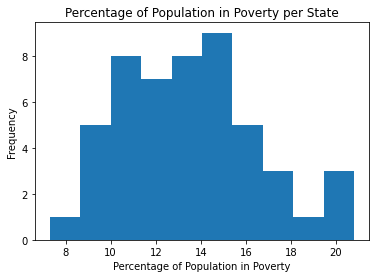

In [30]:
# Visualize shape and spread of poverty percentage per state.
plt.hist(df['poverty_percent'])
plt.title('Percentage of Population in Poverty per State')
plt.xlabel('Percentage of Population in Poverty')
plt.ylabel('Frequency');

In [31]:
# View statistical description of poverty percentage per state.
df.poverty_percent.describe()

count    50.000000
mean     13.518000
std       3.019778
min       7.300000
25%      11.300000
50%      13.300000
75%      15.375000
max      20.800000
Name: poverty_percent, dtype: float64

### Inital Observations

The percentage of the population in poverty appears to be approximately normally distributed with a right skew. To compare characteristics of the states with high vs. low levels of poverty, I will split the dataframe into two dataframes, one containing rows in which the 'poverty_percent'  is above or equal to the median (the top 50%) and one with the 'poverty_percent' less than the median (the bottom 50%).

In [32]:
# Calculate median.
pov_median = df.poverty_percent.median()

In [33]:
# Create two dataframes to separate the top 50% and bottom 50% of states.
high_poverty = df.query('poverty_percent >= {}'.format(pov_median))
low_poverty = df.query('poverty_percent < {}'.format(pov_median))

In [34]:
# View statistical descriptions of states in top 50% poverty percent.
high_poverty.describe()

,population,hs_grad_percent,median_household_income,poverty_percent,employment_percent_change,year,num_permits,total_gun_checks,checks_per_1000
count,2.600000e+01,26.000000,26.000000,26.000000,26.000000,26.0,26.000000,26.000000,26.000000
mean,8.429186e+06,86.253846,48135.269231,15.838462,2.400000,2013.0,14661.385897,44121.825641,7.356480
std,9.080332e+06,2.806739,4971.499102,2.138799,1.343726,0.0,34987.263415,43157.979719,8.120478
min,8.654540e+05,81.800000,39665.000000,13.300000,-1.700000,2013.0,0.016667,7234.716667,1.413835
25%,2.988368e+06,84.425000,45090.000000,14.325000,1.650000,2013.0,914.370833,19235.154167,4.011730
50%,4.912210e+06,85.600000,47545.000000,15.350000,2.600000,2013.0,4212.591667,28359.933333,5.720048
75%,1.009217e+07,88.250000,50096.250000,16.925000,3.200000,2013.0,11591.533333,50565.475000,7.268217
max,3.925002e+07,92.800000,61818.000000,20.800000,4.500000,2013.0,178562.016667,202651.266667,45.673305


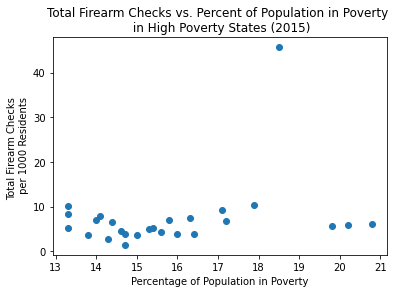

In [35]:
# Visualize relationship between total firearm checks per 1000 residents and percentage of population in poverty.
plt.scatter(high_poverty['poverty_percent'], high_poverty['checks_per_1000'])
plt.title('Total Firearm Checks vs. Percent of Population in Poverty \n in High Poverty States (2015)')
plt.xlabel('Percentage of Population in Poverty')
plt.ylabel('Total Firearm Checks \n per 1000 Residents');

In [36]:
# View statistical descriptions of states in bottom 50% poverty percent.
low_poverty.describe()

,population,hs_grad_percent,median_household_income,poverty_percent,employment_percent_change,year,num_permits,total_gun_checks,checks_per_1000
count,2.400000e+01,24.000000,24.000000,24.000000,24.000000,24.0,24.000000,24.000000,24.000000
mean,4.303646e+06,90.358333,61003.166667,11.004167,1.809014,2013.0,7690.912500,22036.633333,5.344448
std,3.714432e+06,1.622375,7343.264484,1.332040,0.974191,0.0,13823.949736,23873.203177,2.758414
min,5.855010e+05,86.200000,49331.000000,7.300000,0.400000,2013.0,0.000000,1299.900000,0.835772
25%,1.262716e+06,89.350000,54781.750000,10.125000,1.000000,2013.0,146.858333,6438.462500,3.380786
50%,3.092955e+06,90.700000,60569.000000,11.150000,1.650000,2013.0,2417.325000,12506.200000,5.561429
75%,6.215280e+06,91.625000,67225.000000,11.825000,2.225000,2013.0,9480.979167,35075.800000,7.086276
max,1.280154e+07,92.400000,74551.000000,13.000000,4.900000,2013.0,64249.600000,95618.833333,11.443620


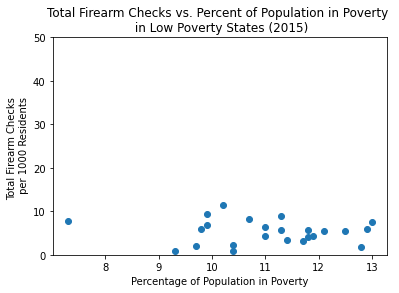

In [37]:
# Visualize relationship between total firearm checks per 1000 residents and percentage of population in poverty.
plt.scatter(low_poverty['poverty_percent'], low_poverty['checks_per_1000'])
plt.title('Total Firearm Checks vs. Percent of Population in Poverty \n in Low Poverty States (2015)')
plt.xlabel('Percentage of Population in Poverty')
plt.ylabel('Total Firearm Checks \n per 1000 Residents')
plt.ylim(0,50);

In [38]:
# Create variables for the median number of firearm checks per 1000 residents for the states with high and low poverty.
median_checks_low = low_poverty['checks_per_1000'].median()
median_checks_high = high_poverty['checks_per_1000'].median()

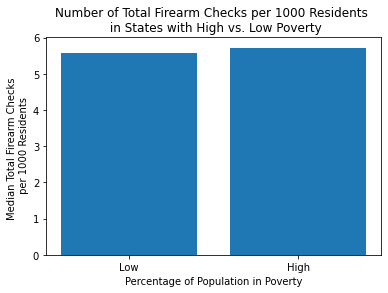

In [39]:
# Visualize relationship between poverty and median total firearm checks.
locations = [1, 2]
heights = [median_checks_low, median_checks_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Number of Total Firearm Checks per 1000 Residents \n in States with High vs. Low Poverty')
plt.xlabel('Percentage of Population in Poverty')
plt.ylabel('Median Total Firearm Checks \n per 1000 Residents');

### Initial Conclusions
The mean total gun checks and mean gun checks per 1000 residents initially seem to be significantly higher in the states with high poverty. However, the max values for both total guns checks and checks per 1000 residents are extremely high in the high poverty states. In the scatterplots, we can clearly see that there is an outlier in the high poverty dataframe that is pulling the mean up. 

When comparing the medians of each group, we see that for most states, the number of gun checks per 1000 residents is very similar with no correlation to poverty. The standard deviation for the high poverty groups is also much larger than the low poverty states; however, this is also due to the outlier, as we can see that the spread is fairly similar in the scatterplots.

To visualize the variation, I used the median number of firearm checks in order to compare without the skew from the outlier. When we do this, we can see in the chart above that there is no correlation between the number of firearm checks and the percentage of the population in poverty.


### Visualizing relationship between poverty level and the number of permit checks

The number of permit checks can also give us insight into the number of individuals who are purchasing or attempting to purchase firearms.

In [40]:
# Find number of permit checks per 1000 people.
permits_per_1000_low = low_poverty['num_permits'] / low_poverty['population'] * 1000
permits_per_1000_high = high_poverty['num_permits'] / high_poverty['population'] * 1000

In [41]:
# Find median number of permits per 1000 residents.
median_permits_low = permits_per_1000_low.median()
median_permits_high = permits_per_1000_high.median()

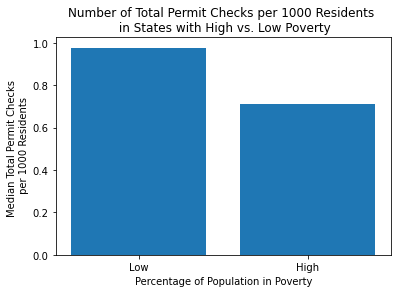

In [42]:
# # Visualize relationship between median total permit checks per 1000 residents and population.
locations = [1, 2]
heights = [median_permits_low, median_permits_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Number of Total Permit Checks per 1000 Residents \n in States with High vs. Low Poverty')
plt.xlabel('Percentage of Population in Poverty')
plt.ylabel('Median Total Permit Checks \n per 1000 Residents');

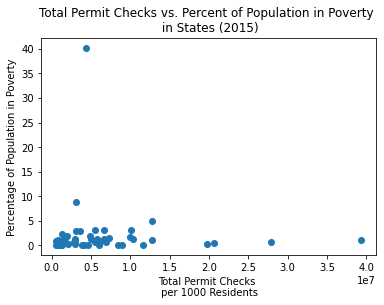

In [43]:
# Visualize relationship between total firearm checks per 1000 residents and population.
permits_per_1000 = df['num_permits'] / df['population'] * 1000

plt.scatter(df['population'], permits_per_1000)
plt.title('Total Permit Checks vs. Percent of Population in Poverty \n in States (2015)')
plt.xlabel('Total Permit Checks \n per 1000 Residents')
plt.ylabel('Percentage of Population in Poverty');

### Conclusion
There is no correlation between the percentage of the population in poverty and the number of permit checks in a state. The scatterplot above shows that there is one major outlier in terms of percentage of population in poverty and a few outliers in total permit checks per 1000 residents; even in those outliers, there is no significant difference in the other variable compared to most states.

## What economic commonalities do states with higher levels of firearm checks share?

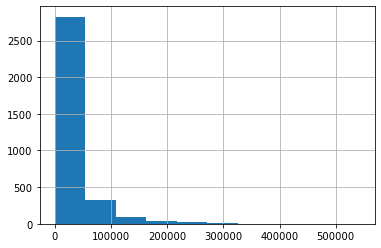

In [44]:
# Visualize shape and spread of all gun checks before normalizing by population.
df_gun.totals.hist();

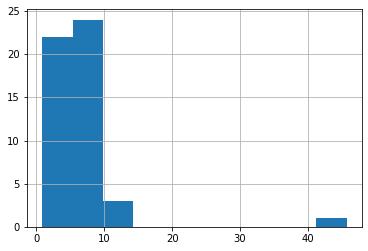

In [45]:
# Visualize the shape and spread of firearm checks per 1000 residents.
df.checks_per_1000.hist();

### Description
Once normalized for population variance, the data is skewed to the right by a single outlier. The majority of the data falls into the first two columns, meaning most states have similar numbers of firearm background checks when controlled for the number of residents. Even without normalizing for the population of the state, the data is skewed left and most data falls into the smallest bin.

Because of the outlier, I will be using the median to split the data. 

Due to the lack of variation between states, I do not expect a significant variation in socio-economic variables.

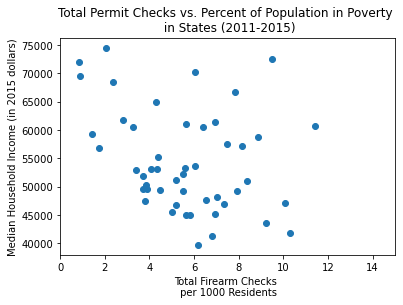

In [46]:
# Visualize relationship between median household income and firearm checks per 1000 residents.
plt.scatter(df['checks_per_1000'], df['median_household_income'])
plt.title('Total Permit Checks vs. Percent of Population in Poverty \n in States (2011-2015)')
plt.xlabel('Total Firearm Checks \n per 1000 Residents')
plt.ylabel('Median Household Income (in 2015 dollars)')

# Set a range for the x-axis. Outlier is discluded.
plt.xlim(0, 15);

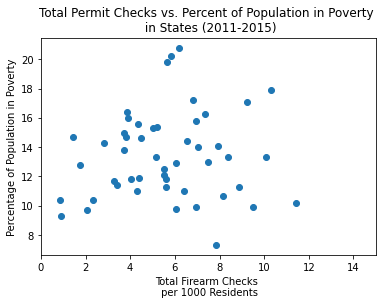

In [47]:
# Visualize relationship between percent of population in poverty and firearm checks per 1000 residents.
plt.scatter(df['checks_per_1000'], df['poverty_percent'])
plt.title('Total Permit Checks vs. Percent of Population in Poverty \n in States (2011-2015)')
plt.ylabel('Percentage of Population in Poverty')
plt.xlabel('Total Firearm Checks \n per 1000 Residents')

# Set a range for the x-axis. Outlier is discluded.
plt.xlim(0,15);

### Initial Observations

As the scatterplots above show, there does not seem to be an economic correlation with the number of firearm checks per 1000 residents.

### Comparing States with High vs. Low Levels of Firearm Checks

When viewing this data, it is important to remember that there aren't significant differences in the number of firearm checks between states. States will be separated into top 50% and bottom 50% by the median, as this will be more accurate than mean due to the outlier.

In [48]:
# Print median and mean for firearm checks per 1000 residents. Mean will be larger due to outlier.

checks_median = df.checks_per_1000.median()
checks_mean = df.checks_per_1000.mean()

print('Median Number of Firearm Checks per 1000 Residents: {}'.format(checks_median))
print('Mean Number of Firearm Checks per 1000 Residents: {}'.format(checks_mean))

Median Number of Firearm Checks per 1000 Residents: 5.615844046676669
Mean Number of Firearm Checks per 1000 Residents: 6.39070443549541


In [49]:
# Create dataframes for states with high numbers of firearm checks and low number of firearm checks per 1000 residents.
high_gun_checks = df.query('checks_per_1000 >= {}'.format(checks_median))
low_gun_checks= df.query('checks_per_1000 < {}'.format(checks_median))

In [50]:
# View statistical data for states with top 50% of firearm checks per 1000 residents.
high_gun_checks.describe()

,population,hs_grad_percent,median_household_income,poverty_percent,employment_percent_change,year,num_permits,total_gun_checks,checks_per_1000
count,2.500000e+01,25.000000,25.000000,25.000000,25.000000,25.0,25.000000,25.000000,25.000000
mean,4.189801e+06,88.404000,52644.960000,14.000000,1.924653,2013.0,15385.476667,36652.758667,9.127886
std,3.318593e+06,3.341217,9442.285292,3.711356,1.310401,0.0,36630.817952,41202.112776,7.774489
min,5.855010e+05,82.300000,39665.000000,7.300000,-1.700000,2013.0,0.016667,5194.216667,5.623710
25%,1.683140e+06,85.000000,45047.000000,11.000000,1.200000,2013.0,737.283333,10988.000000,6.416751
50%,3.576452e+06,89.200000,49255.000000,13.300000,1.900000,2013.0,3918.100000,27197.283333,7.341108
75%,5.540545e+06,91.200000,60629.000000,17.100000,2.900000,2013.0,10764.716667,42952.883333,8.871405
max,1.280154e+07,92.800000,72515.000000,20.800000,4.900000,2013.0,178562.016667,202651.266667,45.673305


In [51]:
# View statistical data for states with bottom 50% of firearm checks per 1000 residents.
low_gun_checks.describe()

,population,hs_grad_percent,median_household_income,poverty_percent,employment_percent_change,year,num_permits,total_gun_checks,checks_per_1000
count,2.500000e+01,25.000000,25.000000,25.000000,25.00000,25.0,25.000000,25.000000,25.000000
mean,8.708053e+06,88.044000,55978.760000,13.036000,2.30800,2013.0,7245.640667,30389.108000,3.653523
std,9.290579e+06,2.873598,8281.303441,2.088037,1.08548,0.0,10353.357165,31968.541158,1.426646
min,6.245940e+05,81.800000,45483.000000,9.300000,0.90000,2013.0,0.000000,1299.900000,0.835772
25%,2.907289e+06,85.800000,49620.000000,11.700000,1.50000,2013.0,151.066667,7475.533333,2.820506
50%,6.016447e+06,88.600000,53183.000000,12.800000,2.20000,2013.0,3550.583333,21171.566667,3.838488
75%,1.014679e+07,90.200000,60509.000000,14.700000,3.20000,2013.0,9097.316667,36933.850000,4.482965
max,3.925002e+07,91.800000,74551.000000,16.400000,4.50000,2013.0,40797.966667,121084.250000,5.607978


### Initial Conclusions

The median high school graduation percentage and median household income is lower for states with high rates of firearm checks per 1000 residents. They are not significantly different and even less so when comparing the means. However, the standard deviation for both graduation percentage and income are larger for the states with high rates of firearm checks per 1000 residents. This indicates a larger spread and therefore larger variation in both variables in states with high rates of firearm checks per 1000 residents as compared to the states with low checks.

Additionally, the median and mean poverty percent are both higher for the states with high levels of gun checks by approximately one percentage point. The standard deviation is almost twice as large in the states with high levels of gun checks, again indicating a larger variation in poverty percent.

Therefore, higher rates of firearm checks correlate to slightly higher rates of poverty and slight lower incomes and high school graduation percentages. States with higher rates of firearm checks tend to also have a greater variability in median socio-economic status as determined by income and high school diplomas. 

In [52]:
# Find median graduation rate for states with high vs. low numbers of firearm checks.
median_grad_low = low_gun_checks['hs_grad_percent'].median()
median_grad_high = high_gun_checks['hs_grad_percent'].median()

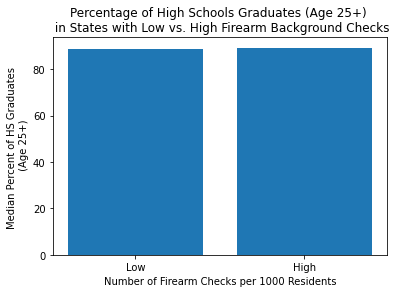

In [53]:
# Visualize difference in median graduation rates.
locations = [1, 2]
heights = [median_grad_low, median_grad_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Percentage of High Schools Graduates (Age 25+) \n in States with Low vs. High Firearm Background Checks')
plt.xlabel('Number of Firearm Checks per 1000 Residents')
plt.ylabel('Median Percent of HS Graduates \n (Age 25+)');

In [54]:
# Find median household income for states with high vs. low numbers of firearm checks.
median_income_low = low_gun_checks['median_household_income'].median()
median_income_high = high_gun_checks['median_household_income'].median()

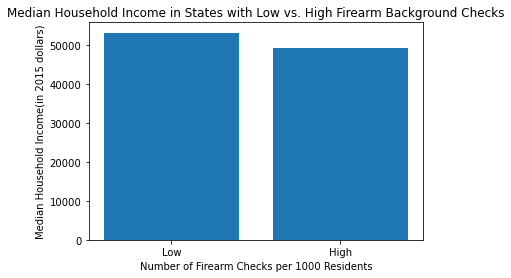

In [55]:
# Visualize difference in median household income for states with high vs. low number of firearm checks per 1000 residents.
locations = [1, 2]
heights = [median_income_low, median_income_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Median Household Income in States with Low vs. High Firearm Background Checks')
plt.xlabel('Number of Firearm Checks per 1000 Residents')
plt.ylabel('Median Household Income(in 2015 dollars)');

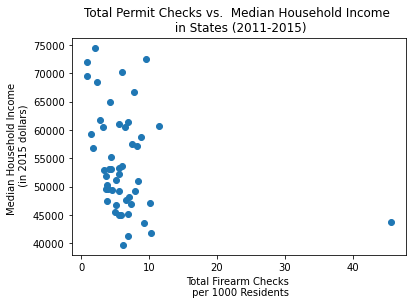

In [56]:
# Visualize relationship between median household income and firearm checks per 1000 residents.
plt.scatter(df['checks_per_1000'], df['median_household_income'])
plt.title('Total Permit Checks vs.  Median Household Income \n in States (2011-2015)')
plt.xlabel('Total Firearm Checks \n per 1000 Residents')
plt.ylabel('Median Household Income \n (in 2015 dollars)');

### Initial Conclusions
There does not appear to be any correlation between the number of firearm checks in a state and the median household income. The majority of states fall between 0 and 10 checks per 1000 residents, and those states are equally represented in the full range of median household income. The only notable exception is the outlier state, which has signficantly more firearm checks and a median household income below the mean for all states. However, as this is only one sample, we cannot draw any conclusions from this.

In [57]:
# Find mean employment change (2014-2015) for states with high vs. low numbers of firearm checks.
mean_empl_change_low = low_gun_checks['employment_percent_change'].mean()
mean_empl_change_high = high_gun_checks['employment_percent_change'].mean()

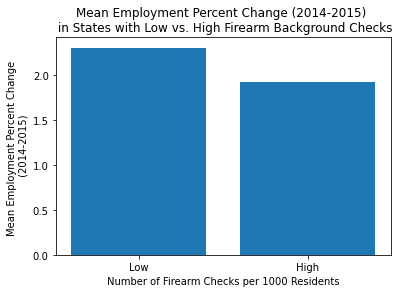

In [58]:
# Visualize difference in mean employment change.
locations = [1, 2]
heights = [mean_empl_change_low, mean_empl_change_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Mean Employment Percent Change (2014-2015) \n in States with Low vs. High Firearm Background Checks')
plt.xlabel('Number of Firearm Checks per 1000 Residents')
plt.ylabel('Mean Employment Percent Change \n (2014-2015)');

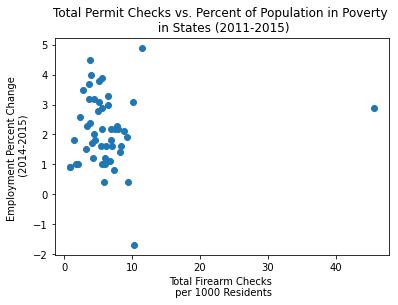

In [59]:
# Visualize relationship between percent change in employment and firearm checks per 1000 residents.
plt.scatter(df['checks_per_1000'], df['employment_percent_change'])
plt.title('Total Permit Checks vs. Percent of Population in Poverty \n in States (2011-2015)')
plt.xlabel('Total Firearm Checks \n per 1000 Residents')
plt.ylabel('Employment Percent Change \n (2014-2015)');

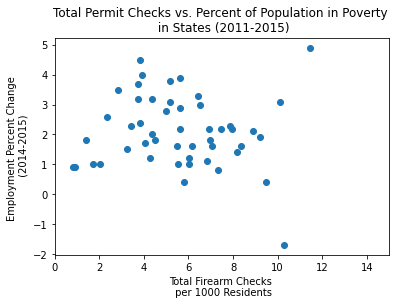

In [60]:
# Visualize relationship between percent change in employment and firearm checks per 1000 residents.
plt.scatter(df['checks_per_1000'], df['employment_percent_change'])
plt.title('Total Permit Checks vs. Percent of Population in Poverty \n in States (2011-2015)')
plt.xlabel('Total Firearm Checks \n per 1000 Residents')
plt.ylabel('Employment Percent Change \n (2014-2015)')

# Set a range for the x-axis. Outlier is discluded.
plt.xlim(0,15);

### Conclusion
Despite what appears to be a noticable variation in the change in unemployment percent, with a clearly smaller growth in employment on average for states with higher numbers of firearm checks per 1000 residents, the scatterplot shows us that this variation is due to a small number of outliers. For the majority of states, unemployment grew between 1 and 5 percentage points no matter the amount of firearm checks per 1000. This is even clearer in the second scatterplot, in which the firearm checks outlier is discluded.

<a id='conclusions'></a>
## Conclusions
> When drawing conclusions on this data, it is important to remember that we do not have data for the number of firearms purchased or the number of firearms owned in the states. We are using only the number of firearm checks and number of permit checks through the FBI's NICS. There is also the concern that different states have different laws requiring firearm checks and that not all firearm sales are done legally. Therefore, we are limited to only having a general idea on the demand for firearms.
> Additionally, our conclusions are based on data from 2011 to 2015 and therefore are limited to that time range. This range could be influenced by unrelated conditions that effect the demand for firearms in some unexpected way.

####  How does poverty correlate to the number of firearm checks in a state? 

> To answer this question, I split the data into states with high or low poverty levels. The high poverty levels includes all states with poverty percentage above or including the median poverty percentage for all states. The low poverty level includes all states with poverty percentage below the median poverty percentage for all states.

> Comparing the median number of firearm checks per 1000 residents to poverty level does not indicate any strong correlation. This can be seen via the table of data generated by the 'describe' function on the states with high vs. low poverty level, as well as a bar graph of the median firearm checks. Interestingly, the median number of permit checks per 1000 residents is  higher for the states with low poverty, as seen in the bar chart "Number of Total Permit Checks per 1000 Residents in States with High vs. Low Poverty." 


> For both firearm checks and permit checks, Kentucky is a significant outlier with mean value of 45.673305 firearm checks per 1000 residents compared to a mean of 6.390704 and median of 5.615844. Because of this, I have used the median for all measures of center involving both firearm and permit checks. 

> The standard deviation for both firearm checks per 1000 residents is much higher in the states with high poverty, indicating a larger spread of data. However, this is being influenced by the outlier, Kentucky, so no definitive conclusions can be drawn.

> In conclusion, I have found no significant correlation between poverty level and the number of firearm checks in a state. There is an interesting correlation with with permit checks in which states with lower poverty tended to have higher numbers of permit checks during the 2011-2015 time period.

#### What economic commonalities do states with higher levels of firearm checks share?
> To explore the commonalities between states with higher levels of firearm checks, I first used a histogram to visualzie the number of firearm checks per 1000 residents and noticed that the data is skewed right due to an outlier. Therefore, I split the data into high and low levels of firearms checks at the median number of firearm checks per state as the mean would be pulled higher due to the outlier. 

> To see the commonalities of states with higher levels of firearm checks on average, I created one dataframe with all states with firearm checks above or equal to the median value. I also created a dataframe with all states with firearm checks below the median value in order to compare with the 'high_gun_checks' data.

> There is no  correlation between high school graduation rates and the level of firearm checks per 1000 residents. States with low levels of firearm checks had a slightly higher median household income and a higher employment percent change between 2011 and 2015. However, for both high school graduation and median income, the standard deviation is higher for the states with high levels of firearm checks. This indicates a larger spread of the data within the states with high levels of firearm checks.

#### Overall Conclusion

> The amount of firearm checks in a state does not seem to be correlated with any socio-economic conditions in the state overall. 

### References

> FBI National Instant Criminal Background Check System (NICS) https://www.fbi.gov/services/cjis/nics

> US Census Bureau https://www.census.gov/topics/income-poverty/poverty.html

> Pandas Documentation https://pandas.pydata.org/docs/reference/

> Matplotlib Documentation https://matplotlib.org/stable/api/pyplot_summary.html

> Extract integer from string https://stackoverflow.com/questions/35376387/extract-int-from-string-in-pandas

